# 2. Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline
sns.set(style='ticks', font_scale=1.3)
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

## Maddison Project

Let's load in the pull Maddison project data. Here we let `mpd` be the long form data.

In [5]:
mpd = pd.read_excel('data/mpd2018.xlsx', sheet_name='Full data')
mpd = mpd[['year', 'countrycode', 'cgdppc', 'rgdpnapc', 'pop']]
mpd.head()

,year,countrycode,cgdppc,rgdpnapc,pop
0,1820,AFG,NaN,NaN,3280.0
1,1870,AFG,NaN,NaN,4207.0
2,1913,AFG,NaN,NaN,5730.0
3,1950,AFG,2392.0,2392.0,8150.0
4,1951,AFG,2422.0,2422.0,8284.0


Now let's `pivot` the data into wide form and store it in `mpan`.

In [6]:
mpan = mpd.pivot('year', 'countrycode')
mpan.head()

cgdppc                                     ... pop              \
countrycode    AFG AGO ALB ARE ARG ARM AUS AUT AZE BDI ... URY     USA UZB   
year                                                   ...                   
1              NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN   680.0 NaN   
730            NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN     NaN NaN   
1000           NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN  1300.0 NaN   
1150           NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN     NaN NaN   
1280           NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN     NaN NaN   

                                                
countrycode VEN VNM YEM     YUG    ZAF ZMB ZWE  
year                                            
1           NaN NaN NaN  1500.0  100.0 NaN NaN  
730         NaN NaN NaN     NaN    NaN NaN NaN  
1000        NaN NaN NaN  1750.0  300.0 NaN NaN  
1150        NaN NaN NaN     NaN    NaN NaN NaN  
1280        NaN NaN NaN     NaN    NaN NaN NaN  

[5 rows x 507 columns]

Here we plot log GDP per capita for a sample of countries (USA, China, and Japan)

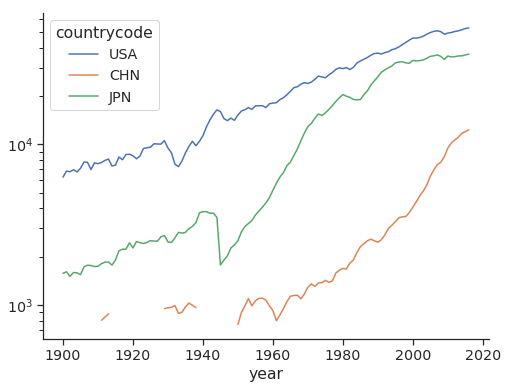

In [7]:
mpan['cgdppc'].loc[1900:][['USA', 'CHN', 'JPN']].plot(logy=True);

It's often useful to study bivariate relationships. This tells us what kinds of correlations exist between the two variables, though it doesn't necessarily mean one is causing the other.

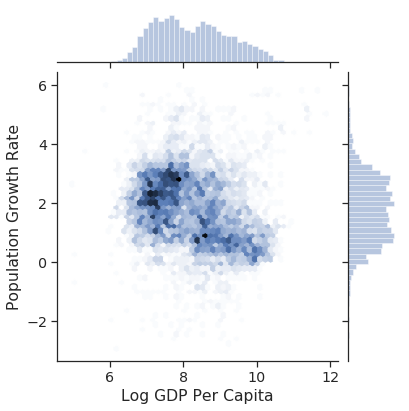

In [8]:
# create a new copy of the data
mpd1 = mpd.copy()

# generate our two variables of interest
mpd1['pop_growth'] = 100*np.log(mpd['pop']).diff()
mpd1['log_cgdppc'] = np.log(mpd1['cgdppc'])

# remove outliers and missing data and focus on 20th century
mpd1 = mpd1.query('pop_growth > -3 and pop_growth < 6')
mpd1 = mpd1.query('year >= 1900 and year < 2000')
mpd1 = mpd1[['pop_growth', 'log_cgdppc']].dropna()

# remove missing data and plot
ax = sns.jointplot('log_cgdppc', 'pop_growth', kind='hex', data=mpd1)
ax.set_axis_labels(xlabel='Log GDP Per Capita', ylabel='Population Growth Rate');

## Penn World Tables

In [9]:
pwt = pd.read_excel('data/pwt90.xlsx', sheet_name='Data')
pwt.head()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
pwt_pan = pwt.pivot('year', 'countrycode')
pwt_pan.head()

country                                                   \
countrycode     ABW     AGO       AIA      ALB                   ARE   
year                                                                   
1950          Aruba  Angola  Anguilla  Albania  United Arab Emirates   
1951          Aruba  Angola  Anguilla  Albania  United Arab Emirates   
1952          Aruba  Angola  Anguilla  Albania  United Arab Emirates   
1953          Aruba  Angola  Anguilla  Albania  United Arab Emirates   
1954          Aruba  Angola  Anguilla  Albania  United Arab Emirates   

                                                                          \
countrycode        ARG      ARM                  ATG        AUS      AUT   
year                                                                       
1950         Argentina  Armenia  Antigua and Barbuda  Australia  Austria   
1951         Argentina  Armenia  Antigua and Barbuda  Australia  Austria   
1952         Argentina  Armenia  Antigua and Barbuda  Australia  Austria   
1953         Argentina  Armenia  Antigua and Barbuda  Australia  Austria   
1954         Argentina  Armenia  Antigua and Barbuda  Australia  Austria   

               ...         pl_k                                              \
countrycode    ...          USA UZB VCT       VEN VGB VNM YEM       ZAF ZMB   
year           ...                                                            
1950           ...     0.133170 NaN NaN  0.168263 NaN NaN NaN  0.104292 NaN   
1951           ...     0.142574 NaN NaN  0.196443 NaN NaN NaN  0.099176 NaN   
1952           ...     0.145043 NaN NaN  0.196494 NaN NaN NaN  0.137831 NaN   
1953           ...     0.146828 NaN NaN  0.197569 NaN NaN NaN  0.124052 NaN   
1954           ...     0.148191 NaN NaN  0.180884 NaN NaN NaN  0.114128 NaN   

                       
countrycode       ZWE  
year                   
1950              NaN  
1951              NaN  
1952              NaN  
1953              NaN  
1954         0.147565  

[5 rows x 8190 columns]

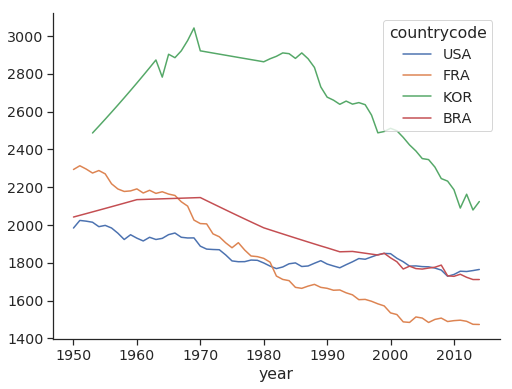

In [11]:
pwt_pan['avh'][['USA', 'FRA', 'KOR', 'BRA']].plot();

We can also do things like plot the average hours worked across all countries over the years.

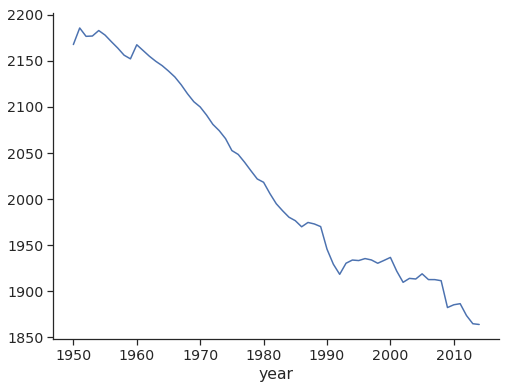

In [12]:
pwt_pan['avh'].mean(axis=1).plot();